In [1]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
time1 = time.time()
print(time1)
batch_size = [36]
device = 9
model_name_list = ["untran-alexnet"]

1591152742.750963


In [2]:
model1 = models.alexnet(pretrained = False)
model1

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [3]:
model1.classifier = nn.Sequential(nn.Linear(9216,4096),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(4096,4096),
                                 nn.ReLU(),
                                 nn.Linear(4096,6))
model1

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, 

untran-alexnet
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.7981, Accuracy: 21.3801%,Valid: Loss: 1.7325, Accuracy: 22.5610%,Time: 6.2586s
Epoch: 2
Epoch: 002, Training: Loss: 1.6024, Accuracy: 30.5430%,Valid: Loss: 1.8591, Accuracy: 32.3171%,Time: 5.7127s
Epoch: 3
Epoch: 003, Training: Loss: 1.5178, Accuracy: 35.5204%,Valid: Loss: 1.4896, Accuracy: 40.8537%,Time: 5.9495s
Epoch: 4
Epoch: 004, Training: Loss: 1.4757, Accuracy: 38.8009%,Valid: Loss: 1.4692, Accuracy: 40.5488%,Time: 5.6252s
Epoch: 5
Epoch: 005, Training: Loss: 1.4029, Accuracy: 44.7398%,Valid: Loss: 1.4243, Accuracy: 42.9878%,Time: 5.3000s
Epoch: 6
Epoch: 006, Training: Loss: 1.3086, Accuracy: 47.1719%,Valid: Loss: 1.4238, Accuracy: 44.5122%,Time: 5.7766s
Epoch: 7
Epoch: 007, Training: Loss: 1.2341, Accuracy: 50.4525%,Valid: Loss: 1.3381, Accuracy: 48.4756%,Time: 6.5341s
Epoch: 8
Epoch: 008, Training: Loss: 1.2077, Accuracy: 51.9796%,Valid: Loss: 1.3049, Accuracy: 50.3049%,Time: 6.0010s
Epoch: 9
Epoch: 009, Training: L

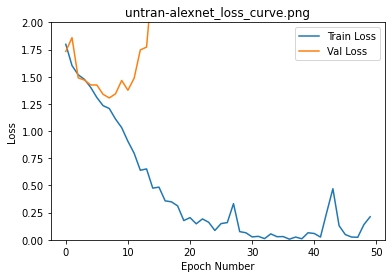

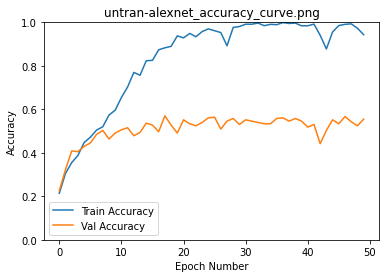

In [4]:
model_list = [model1]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
for size in batch_size:
    i = 0
    for models in model_list:
        file_name = model_name_list[i]
        print(file_name)
        optimizer = optim.Adam(models.parameters())
        trainmodel(model_name=models,loss = lossfunc,batchsize=size,opti=optimizer,\
                   epoch_num=50,device_num=device,filename=file_name)
        i+=1